In [43]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
image = np.array(Image.open('C:\\Users\\thula\\PR Assignments\\Images\\lemon.jpeg'))

Original Image Shape: (100, 100, 3)
Single Channel Image Shape: (100, 100)


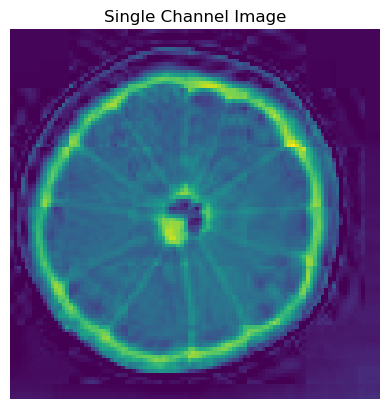

In [45]:
print("Original Image Shape:", image.shape)
# Create a new variable img_single_channel that is equivalent to the last color channel of the image
img_single_channel = image[:, :, -1]
# Print the shape of img_single_channel to check that it has the same number of pixels as the original image
print("Single Channel Image Shape:", img_single_channel.shape)
plt.imshow(img_single_channel)  
plt.title('Single Channel Image')
plt.axis('OFF')  
plt.show()

Average Channel Image Shape: (100, 100)


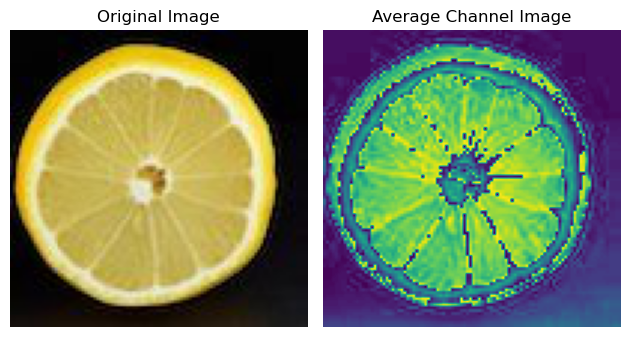

' comment on the differences and which one you would say is better\n\nThe result of plotting the original image here will display the full-color image with all its original colors and details intact.\nIn Part 1, the result was a transformation of the original image, \nwhich might have been altered depending on the specific transformation matrix applied. \nIt could be a rotated, scaled, or otherwise transformed version of the original image.'

In [46]:
img_average_channel = np.mean(image, axis=-1, dtype=np.uint8)
print("Average Channel Image Shape:", img_average_channel.shape)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)  
plt.title('Average Channel Image')
plt.axis('off')
plt.tight_layout()
plt.show()

''' comment on the differences and which one you would say is better

The result of plotting the original image here will display the full-color image with all its original colors and details intact.
In Part 1, the result was a transformation of the original image, 
which might have been altered depending on the specific transformation matrix applied. 
It could be a rotated, scaled, or otherwise transformed version of the original image.'''


In [30]:
# Identity matrix is a Square matrix where the diagonal elements of the matrix are 1's and the remaining elements are 0's.
# It can be denoted using I. 
# Whenever a matrix(X) is multipled with an Identity matrix(I) , the resulting matrix will be the matrix same as matrix(X) multiplied with Identity matrix(I)
#i.e., XI=IX=X
X_axis, Y_axis = img_average_channel.shape
identity_matrix = np.eye(X_axis,Y_axis)
print(identity_matrix[14])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [31]:
N=img_average_channel.shape[0]
rows= np.arange(N)
np.random.shuffle(rows)
print(rows)

[16 72 50 93 65 52 18 32 51 92 67 39 90 73  8 11 79 77 80 55 75 60 84  9
 69 42  0 95 98  1 10 34 48 33 82  3 54  7 13 31 27 15 38 64 40 99 17 66
 56 35 71 44 28  6 58 26  4  2 87 37 24 43 53 25 21 78 59 22 86 62 49 47
 96 76 57 94 89 12 19 68 85 36 74 97 30 61 45 83 14 70 91 29  5 23 88 63
 41 81 46 20]


In [32]:
T=identity_matrix[rows]
print(T)
print(T.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 100)


(100, 100)


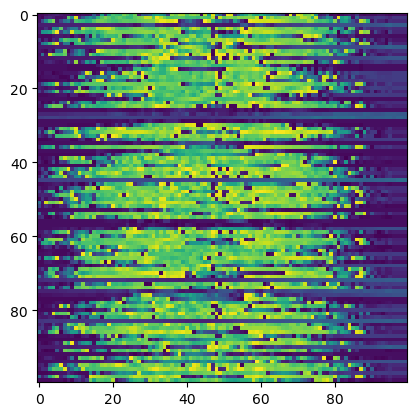

In [33]:
transformed_image= np.dot(T, img_average_channel)
print(transformed_image.shape)
plt.imshow(transformed_image)

T is invertible.


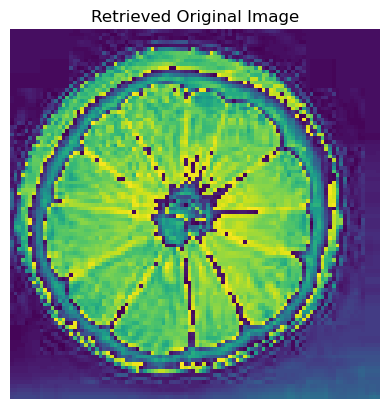

In [47]:
'''To determine if matrix `T` is invertible, we have to check if it is a square matrix and if its determinant is non-zero.
If it meets these criteria, `T` is invertible and to retrieve the original image we use the inverse matrix to reverse the transformation.'''
if T.shape[0] == T.shape[1]:
    # Compute the determinant of T
    det_T = np.linalg.det(T)
    # Check if the determinant is nonzero, indicating that T is invertible
    if det_T != 0:
        Tinv = np.linalg.inv(T)
        print("T is invertible.")
    else:
        print("T is not invertible (determinant is zero).")
else:
    print("T is not square, so it is not invertible.")
retrieved_image = np.matmul(Tinv, transformed_image)
plt.imshow(retrieved_image)
plt.title('Retrieved Original Image')
plt.axis('off')
plt.show()
